In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [2]:
data = pd.read_csv('data/trees.csv')

In [3]:
data = np.array(data)

In [4]:
xdata = data[:,:-1]
ydata = data[:,[-1]]

In [5]:
#정규화
feature_scale = preprocessing.MinMaxScaler()
xdataN = feature_scale.fit_transform(xdata)

label_scale = preprocessing.MinMaxScaler()
ydataN = label_scale.fit_transform(ydata)

In [6]:
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.constant(ydataN, tf.float32)
w = tf.Variable(tf.random_uniform([2,1]))
b = tf.Variable(tf.random_uniform([1]))

hx = tf.matmul(x,w) + b
cost = tf.reduce_mean(tf.square(hx-y))

optimizer = tf.train.AdamOptimizer(0.1) #learning rate
train = optimizer.minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(10000):
    sess.run(train, {x:xdataN})
#     print(i, sess.run(cost, {x:xdataN}))    

In [7]:
sess.run(w)

array([[0.8669214 ],
       [0.12188635]], dtype=float32)

In [8]:
sess.run(b)

array([-0.11582517], dtype=float32)

In [9]:
arr = feature_scale.transform([[8.8,63]]) #예측값
label_scale.inverse_transform(sess.run(hx, {x:arr})) #역정규화

array([[4.816958]], dtype=float32)

In [11]:
arr = feature_scale.transform([[10.5,72]]) #예측값
label_scale.inverse_transform(sess.run(hx, {x:arr})) #역정규화

array([[15.874081]], dtype=float32)

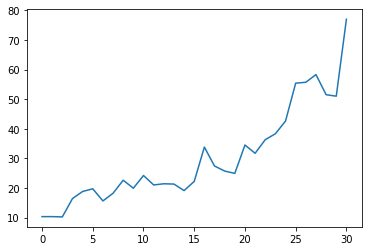

In [12]:
plt.plot( ydata )
plt.show()